# P.C.A.

In [13]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
from sklearn.decomposition import PCA
import math 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
#plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False



In [3]:
data=pd.read_csv('star.txt',sep='\s+')

In [4]:
x=np.array(data.F606W-data.F814W)
y=np.array(data.F606W)

In [12]:
data.head()

,#ID,X,Y,F606W,error,F814W,error.1,Chi,Sharp
0,8,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106,0.7310
1,120,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690,0.4000
2,165,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651,0.1940
3,226,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059,-1.9585
4,351,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274,-0.7720


In [447]:
notar=data.drop(columns=['Sharp','#ID'])

In [448]:
notar

,X,Y,F606W,error,F814W,error.1,Chi
0,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106
1,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690
2,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651
3,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059
4,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274
...,...,...,...,...,...,...,...
51475,3417.467,10394.319,26.895,0.0783,25.602,0.1050,9.508
51476,3435.031,10396.730,23.152,0.0504,22.662,0.0505,8.823
51477,3594.567,10397.340,27.209,0.0815,27.130,0.0900,4.311
51478,5155.093,10397.920,28.235,0.0984,26.477,0.0937,6.173


In [449]:
VAR_R=pca.explained_variance_ratio_

([<matplotlib.axis.XTick at 0x7fa5acb47f40>,
 <a list of 3 Text xticklabel objects>)

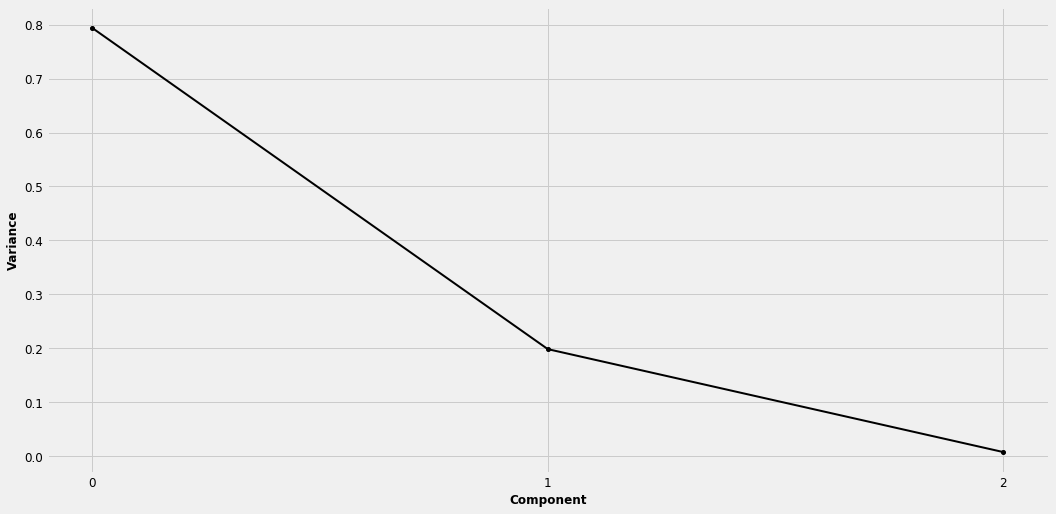

In [450]:
plt.plot(VAR_R,color='k',marker='.')
plt.grid(True)
plt.xlabel('Component')
plt.ylabel('Variance')
plt.xticks([0,1,2])

In [451]:
pca=PCA(n_components=3)
pca=pca.fit(notar)
pca_data=pd.DataFrame(pca.transform(notar))

In [452]:
pca_data=pca_data.rename(columns={0:'FirstComponent',1:'SecondComponent',2:'ThirdComponent'})

In [453]:
pca_data.tail()

,FirstComponent,SecondComponent,ThirdComponent
51475,-2595.533534,4352.168882,-2.548815
51476,-2608.235077,4339.799052,2.189038
51477,-2706.797907,4214.351512,-3.699351
51478,-3666.679220,2983.957433,-4.293191
51479,-3977.662877,2587.956795,-0.506620


In [454]:
notar.corr()

,X,Y,F606W,error,F814W,error.1,Chi
X,1.000000,0.053451,-0.096873,-0.081905,-0.103088,-0.075036,0.036013
Y,0.053451,1.000000,-0.154213,-0.112309,-0.162024,-0.103044,0.043035
F606W,-0.096873,-0.154213,1.000000,0.560325,0.981704,0.516773,0.041261
error,-0.081905,-0.112309,0.560325,1.000000,0.565141,0.800688,0.249743
F814W,-0.103088,-0.162024,0.981704,0.565141,1.000000,0.572660,0.044171
error.1,-0.075036,-0.103044,0.516773,0.800688,0.572660,1.000000,0.276366
Chi,0.036013,0.043035,0.041261,0.249743,0.044171,0.276366,1.000000


In [455]:
pca_data.corr()

,FirstComponent,SecondComponent,ThirdComponent
FirstComponent,1.000000e+00,-3.953445e-16,1.117607e-15
SecondComponent,-3.953445e-16,1.000000e+00,-6.841960e-16
ThirdComponent,1.117607e-15,-6.841960e-16,1.000000e+00


In [456]:
COL_NAMES=pca_data.columns.tolist()

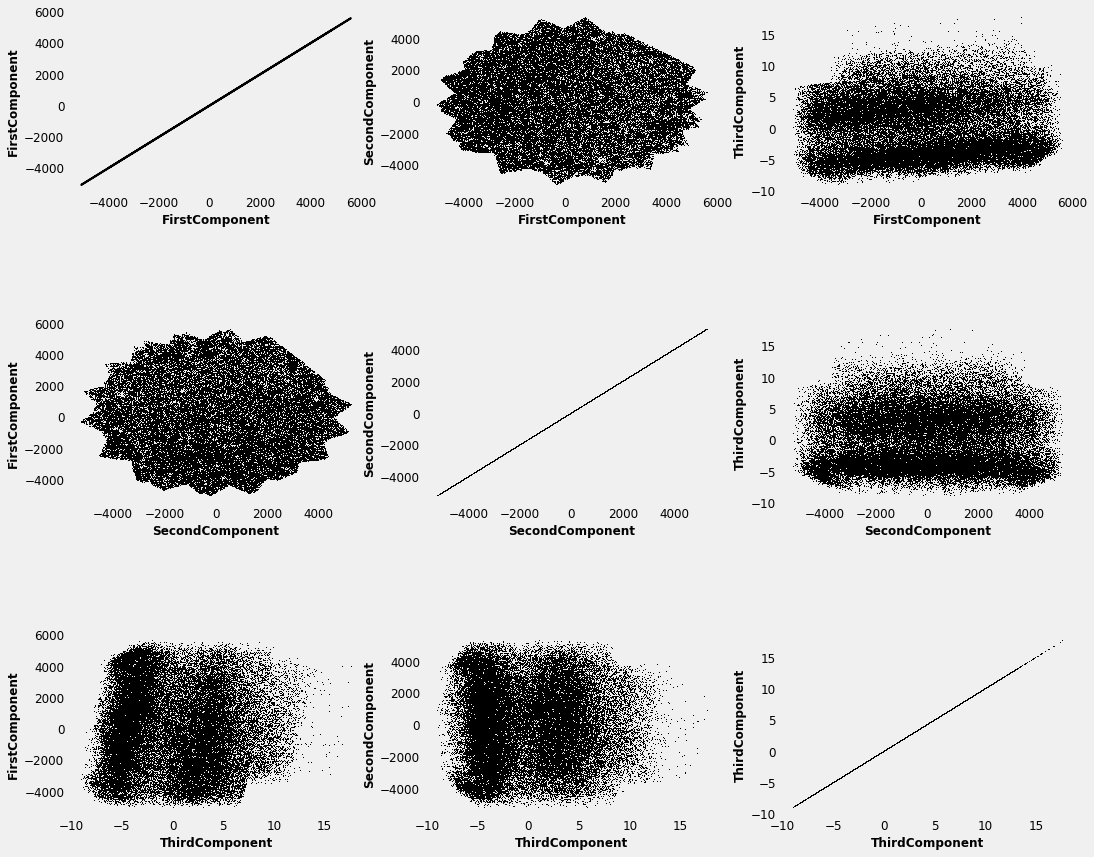

In [457]:
k=1
for i in range(3):
    col=COL_NAMES[i]
    for j in range(3):
        if k==1:
            plt.subplot(3,3,k)
            plt.subplots_adjust(left=0.025, bottom=0.1, right=0.9, top=1.5, wspace=0.2, hspace=0.7)

            plt.plot(pca_data[col],pca_data[COL_NAMES[j]],color='k')
            plt.xlabel(COL_NAMES[i])
            plt.ylabel(COL_NAMES[j])
        else:
            plt.subplot(3,3,k)
            plt.subplots_adjust(left=0.025, bottom=0.1, right=0.9, top=1.5, wspace=0.2, hspace=0.7)

            plt.plot(pca_data[col],pca_data[COL_NAMES[j]],',',color='k')
            plt.xlabel(COL_NAMES[i])
            plt.ylabel(COL_NAMES[j])

        k=k+1


In [226]:
 from sklearn.feature_selection import mutual_info_regression as mi


In [250]:
COL_NAMES=data.columns.tolist()

In [260]:
MI=[]
for col in COL_NAMES[1:-1]:
    MI.append(mi(np.array(data[col].tolist()).reshape(-1,1),np.array(data.Sharp)))
    print ('Mutual information computed between '+ str(col)+ ' and Sharp')

Mutual information computed between X and Sharp
Mutual information computed between Y and Sharp
Mutual information computed between F606W and Sharp
Mutual information computed between error and Sharp
Mutual information computed between F814W and Sharp
Mutual information computed between error.1 and Sharp
Mutual information computed between Chi and Sharp


In [271]:
NEW_MI=[]
for i in range(len(MI)):
    NEW_MI.append(MI[i][0])

In [274]:
MI_data=pd.DataFrame({'Column':COL_NAMES[1:-1],'Mutual Information':NEW_MI})

In [285]:
MI_data

,Column,Mutual Information
0,X,0.045130
1,Y,0.073418
2,F606W,0.458348
3,error,0.562892
4,F814W,0.468252
5,error.1,0.554799
6,Chi,0.343345


In [276]:
PCA_COL_NAMES=pca_data.columns.tolist()

In [277]:
MI=[]
for col in PCA_COL_NAMES:
    MI.append(mi(np.array(pca_data[col].tolist()).reshape(-1,1),np.array(data.Sharp)))
    print ('Mutual information computed between '+ str(col)+ ' and Sharp')

Mutual information computed between FirstComponent and Sharp
Mutual information computed between SecondComponent and Sharp
Mutual information computed between ThirdComponent and Sharp


In [278]:
PCA_MI=[]
for i in range(len(MI)):
    PCA_MI.append(MI[i][0])

In [280]:
PCA_MI_data=pd.DataFrame({'Column':PCA_COL_NAMES,'Mutual Information':PCA_MI})

In [286]:
PCA_MI_data

,Column,Mutual Information
0,FirstComponent,0.061894
1,SecondComponent,0.051078
2,ThirdComponent,0.414398


# P.C.A. Excluding Space

In [461]:
notar=data.drop(columns=['Sharp','#ID','X','Y'])

In [462]:
notar.head()

,F606W,error,F814W,error.1,Chi
0,28.197,0.1036,27.127,0.1068,6.106
1,20.843,0.0552,19.815,0.0661,10.690
2,27.014,0.2194,26.068,0.1349,10.651
3,30.193,0.3641,28.270,0.1636,4.059
4,28.935,0.1669,28.941,0.2464,4.274


In [463]:
pca=PCA(n_components=3)
pca=pca.fit(notar)
pca_data=pd.DataFrame(pca.transform(notar))

In [464]:
pca_data=pca_data.rename(columns={0:'FirstComponent',1:'SecondComponent',2:'ThirdComponent'})

In [465]:
COL_NAMES=pca_data.columns.tolist()

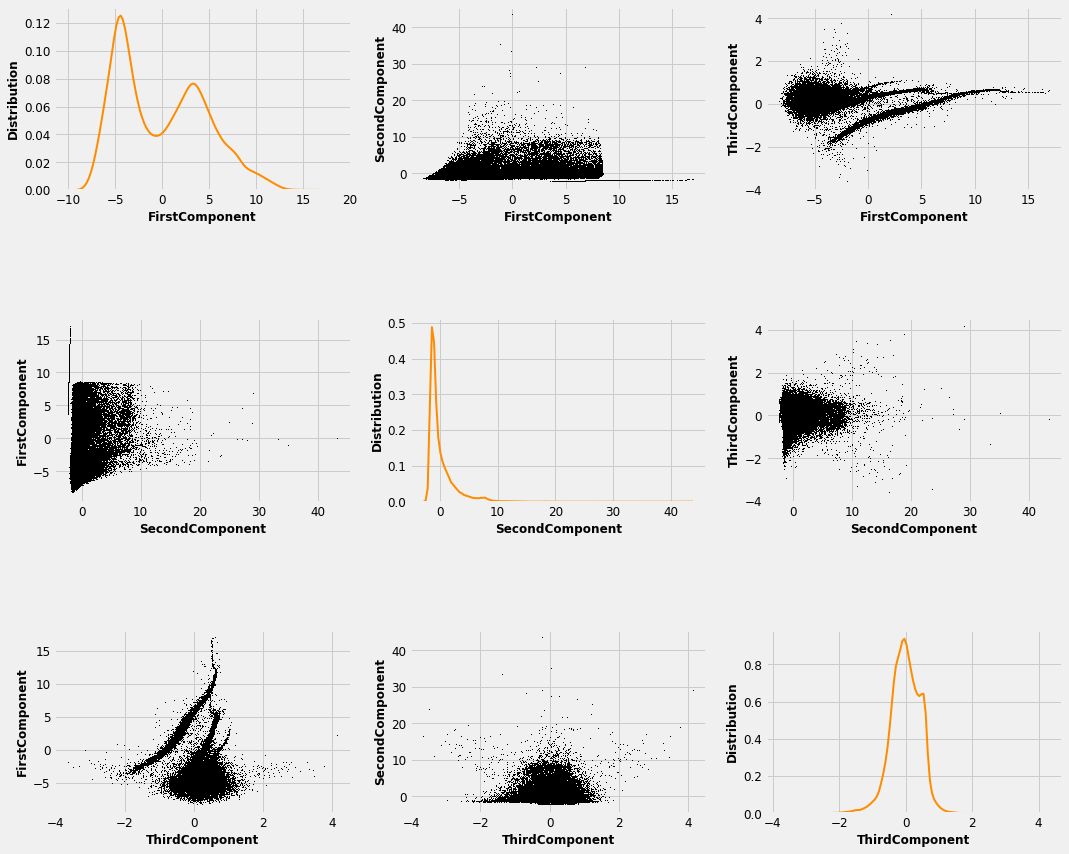

In [466]:
k=1
q=0
for i in range(3):
    col=COL_NAMES[i]
    for j in range(3):
        if k==1 or k==5 or k==9:
            plt.subplot(3,3,k)
            plt.subplots_adjust(left=0.025, bottom=0.1, right=0.9, top=1.5, wspace=0.2, hspace=0.7)

            sns.kdeplot(pca_data[COL_NAMES[i]],color='darkorange')
            #g._legend.remove()
            plt.grid(True)
            plt.xlabel('Values')
            plt.legend([],[], frameon=False)

            plt.xlabel(COL_NAMES[i])
            plt.ylabel('Distribution')
            #plt.ylabel(COL_NAMES[j])
        else:
            plt.subplot(3,3,k)
            plt.subplots_adjust(left=0.025, bottom=0.1, right=0.9, top=1.5, wspace=0.2, hspace=0.7)

            plt.plot(pca_data[col],pca_data[COL_NAMES[j]],',',color='k')
            plt.xlabel(COL_NAMES[i])
            plt.ylabel(COL_NAMES[j])
            plt.grid(True)

        k=k+1

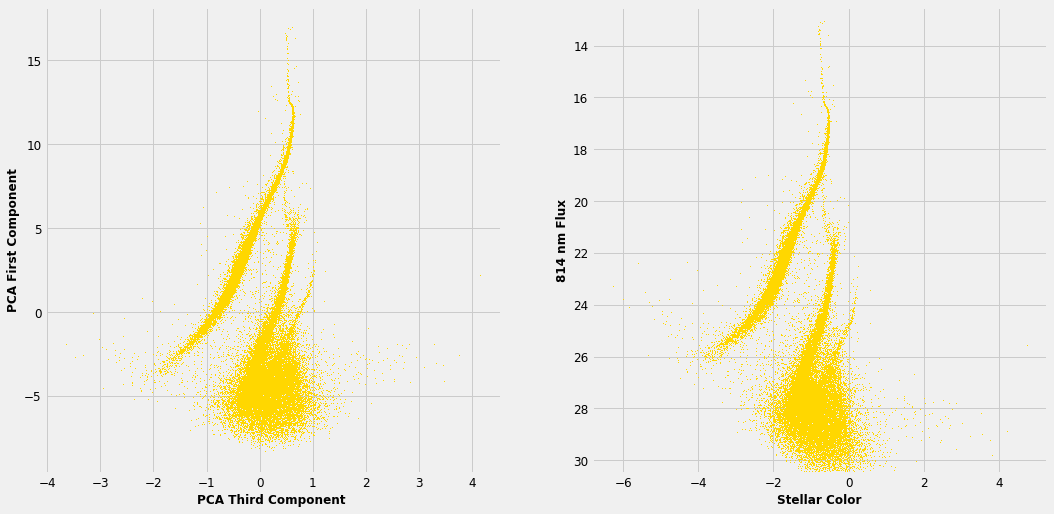

In [469]:
plt.subplot(1,2,1)
plt.plot(pca_data['ThirdComponent'],pca_data['FirstComponent'],',',color='gold')
plt.xlabel('PCA Third Component ')
plt.ylabel('PCA First Component')
plt.grid(True)
plt.subplot(1,2,2)
plt.ylim(30.5,12.5)
plt.ylabel('814 nm Flux')
plt.xlabel('Stellar Color')
plt.plot(np.array(data['F814W']-data['F606W']),data.F814W,',',color='gold')
plt.grid(True)

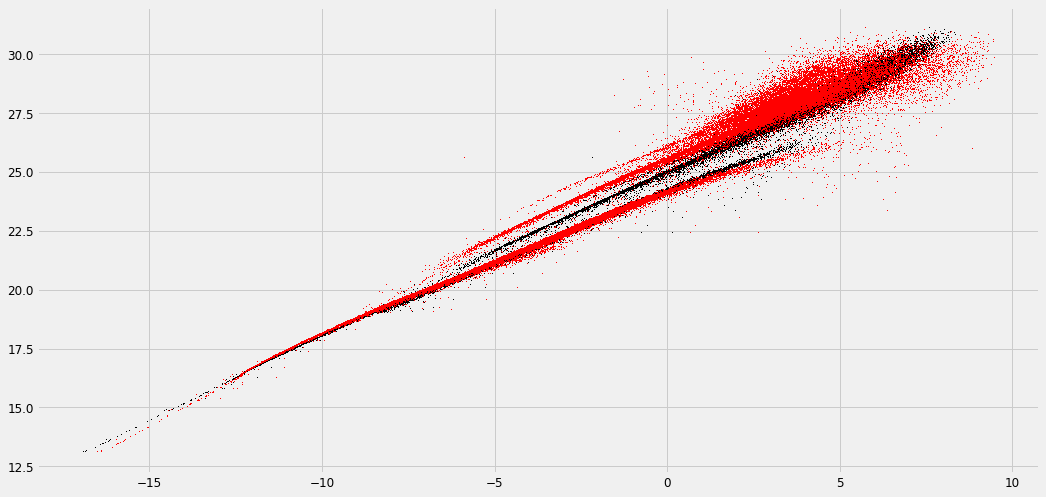

In [471]:
plt.plot(-pca_data.FirstComponent,data.F814W,',',color='k')
plt.plot((data.F606W-26.5)*1.3+5*data.error,data.F814W,',',color='red')
##plt.plot((data.F606W-26.2)*1.3-data.error,data.F814W,',',color='purple')

#plt.plot(-pca_data.FirstComponent,data.F606W,',',color='red')
plt.grid(True)

In [472]:
from sklearn.metrics import mean_squared_error

In [514]:
A=np.arange(1,3,0.1)
B=np.arange(-30.5,-22.5,0.5)
C=np.arange(-15,15,1)
orig=-pca_data.FirstComponent
max_pca=np.abs(-pca_data.FirstComponent.max())
RMSE=[]
TRIPLET=[]
for a in A:
    
    for b in B:
        for c in C:
            recons=(data.F606W+b)*a+c*data.error
            RMSE.append(np.sqrt(mean_squared_error(recons,orig)))
            TRIPLET.append([a,b,c])

In [515]:
#np.array(RMSE).argmin()
a_opt=TRIPLET[np.array(RMSE).argmin()][0]
b_opt=TRIPLET[np.array(RMSE).argmin()][1]
c_opt=TRIPLET[np.array(RMSE).argmin()][2]
r_opt=(data.F606W+b_opt)*a_opt+c_opt*data.error

In [516]:
D=np.arange(-10,10,0.1)
BEST_RMSE=[]
for d in D:
    recons=r_opt+d*data.F814W
    BEST_RMSE.append(np.sqrt(mean_squared_error(recons,orig)))

In [517]:
D=np.arange(-1,1,0.01)
BEST_RMSE=[]
for d in D:
    recons=r_opt+d*data.F814W
    BEST_RMSE.append(np.sqrt(mean_squared_error(recons,orig)))

In [518]:
d_opt=0

In [519]:
r_opt=(data.F606W+b_opt)*a_opt+c_opt*data.error+d_opt*data.F606W

In [522]:
E=np.arange(-10,10,1)
BEST_RMSE=[]
for e in E:
    recons=r_opt+e*data['error.1']
    BEST_RMSE.append(np.sqrt(mean_squared_error(recons,orig)))

In [524]:
BEST_RMSE=np.array(BEST_RMSE)

In [527]:
E=np.arange(-1,1,0.01)
BEST_RMSE=[]
for e in E:
    recons=r_opt+e*data['error.1']
    BEST_RMSE.append(np.sqrt(mean_squared_error(recons,orig)))

In [530]:
e_opt=E[np.array(BEST_RMSE).argmin()]

In [587]:
r_opt_first=r_opt+e_opt*data['error.1']

In [589]:
first_RMSE=np.array(BEST_RMSE).min()/max_pca

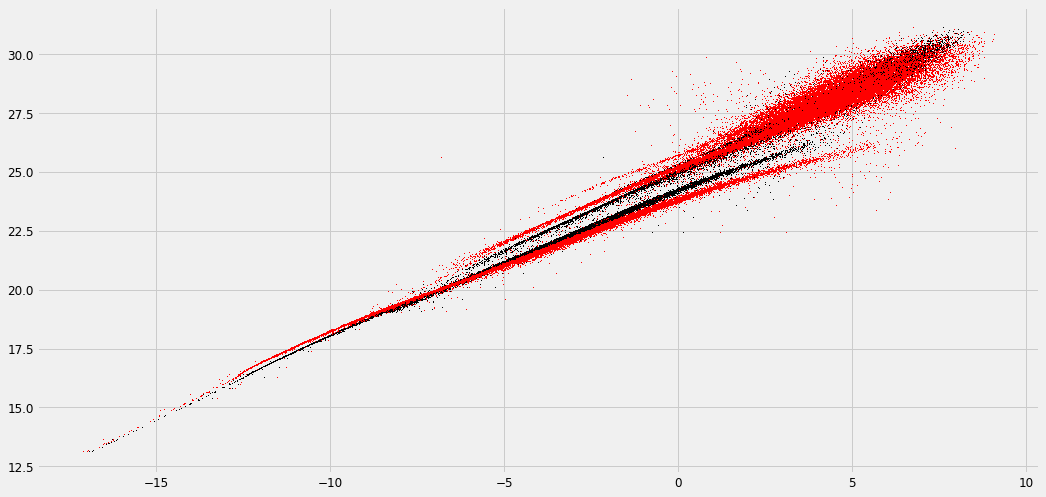

In [538]:
plt.plot(-pca_data.FirstComponent,data.F814W,',',color='k')
plt.plot(r_opt,data.F814W,',',color='red')
plt.grid(True)

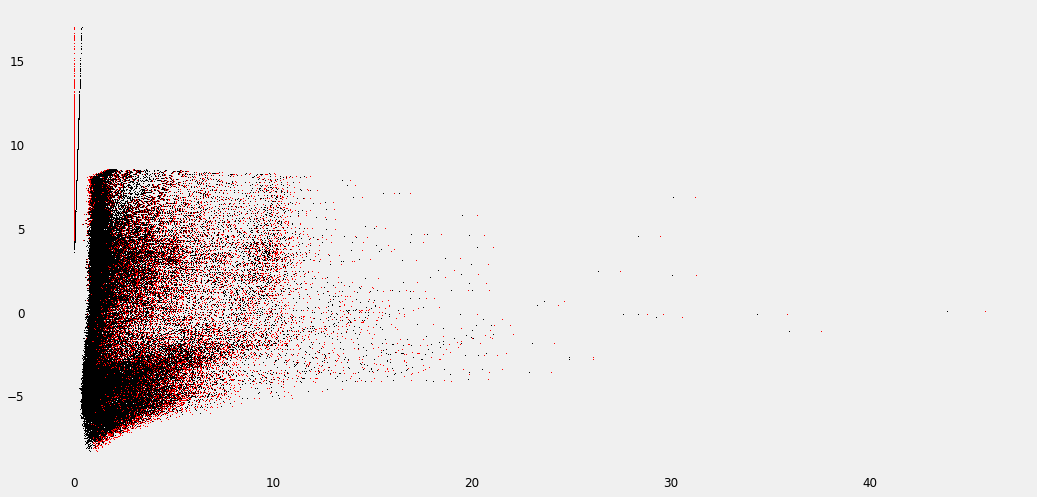

In [586]:
#plt.plot(np.array(data.Chi),np.array(data.F814W-data.F606W),',')
plt.plot(np.array(data.Chi),pca_data['FirstComponent'],',',color='red')
plt.plot(pca_data.SecondComponent*0.96+2.276,pca_data['FirstComponent'],',',color='black')

In [639]:
r_opt_sec=pca_data.SecondComponent*0.96+2.276

In [592]:
second_RMSE=np.sqrt(mean_squared_error(pca_data.SecondComponent*0.96+2.276,data.Chi))/data.Chi.max()

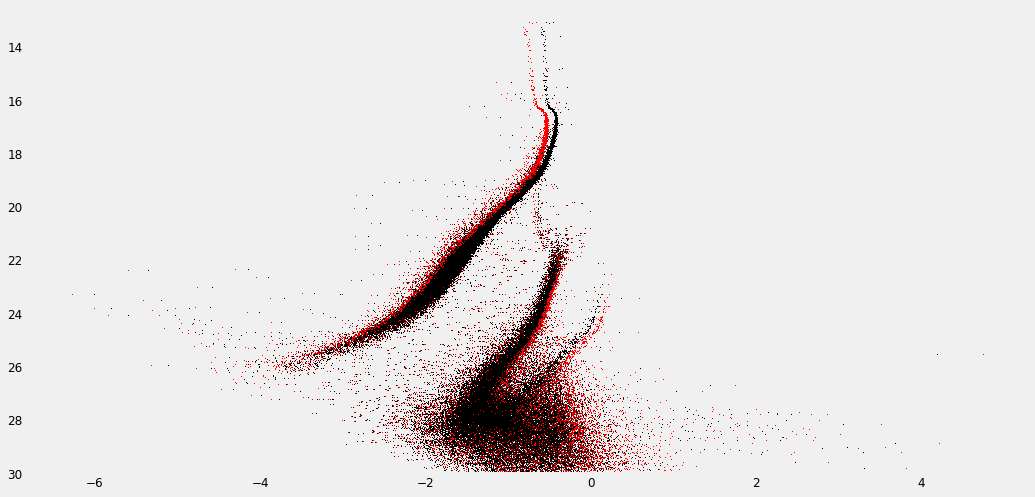

In [638]:
plt.ylim(30.0,12.5)
plt.plot(np.array(data['F814W']-data['F606W']),data.F814W,',',color='red')
plt.plot(-1.24+1.31*pca_data.ThirdComponent,data.F814W,',',color='k')

In [640]:
r_opt_third=-1.24+1.31*pca_data.ThirdComponent

In [635]:
third_RMSE=np.sqrt(mean_squared_error(-1.24+1.31*pca_data.ThirdComponent,np.array(data.F814W-data.F606W)))

In [636]:
third_RMSE=third_RMSE/np.array(data['F814W']-data['F606W']).max()

In [643]:
pca_data['X']=data.X
pca_data['Y']=data.Y

In [645]:
pca_data['Sharp']=data.Sharp

In [647]:
pca_data.corr()

,FirstComponent,SecondComponent,ThirdComponent,X,Y,Sharp
FirstComponent,1.000000e+00,3.173146e-16,5.037970e-15,0.099932,0.158212,0.150557
SecondComponent,3.173146e-16,1.000000e+00,6.676048e-16,0.041774,0.052153,0.043882
ThirdComponent,5.037970e-15,6.676048e-16,1.000000e+00,-0.033146,-0.041472,0.057914
X,9.993192e-02,4.177417e-02,-3.314617e-02,1.000000,0.053451,0.044140
Y,1.582116e-01,5.215253e-02,-4.147194e-02,0.053451,1.000000,0.051405
Sharp,1.505570e-01,4.388162e-02,5.791408e-02,0.044140,0.051405,1.000000


In [650]:
pca_data=pca_data.drop(columns=['Sharp'])

In [653]:
PCA_COL_NAMES=pca_data.columns.tolist()

In [654]:
MI=[]
for col in PCA_COL_NAMES:
    MI.append(mi(np.array(pca_data[col].tolist()).reshape(-1,1),np.array(data.Sharp)))
    print ('Mutual information computed between '+ str(col)+ ' and Sharp')

Mutual information computed between FirstComponent and Sharp
Mutual information computed between SecondComponent and Sharp
Mutual information computed between ThirdComponent and Sharp
Mutual information computed between X and Sharp
Mutual information computed between Y and Sharp


In [656]:
MI=np.array(MI)

In [657]:
MI.mean()

0.2107839135993494